Source : https://www.kaggle.com/datasets/abhinav89/telecom-customer

+ Churn rate

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,train_test_split
from sklearn.metrics import plot_confusion_matrix,classification_report, confusion_matrix,precision_score, recall_score, f1_score, accuracy_score


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


/Users/danielbeltsazar/opt/anaconda3/envs/boost/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('/Users/danielbeltsazar/DS-ML-DL Mini Projects/Exploring/Classification/Customer Churn/Telecom_customer churn.csv')

df.head()


,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

- rev_Mean: Mean monthly revenue (charge amount)
- mou_Mean: Mean number of monthly minutes of use
- totmrc_Mean: Mean total monthly recurring charge
- da_Mean: Mean number of directory assisted calls
- ovrmou_Mean: Mean overage minutes of use
- ovrrev_Mean: Mean overage revenue
- vceovr_Mean: Mean revenue of voice overage
- datovr_Mean: Mean revenue of data overage
- roam_Mean: Mean number of roaming calls
- change_mou: Percentage change in monthly minutes of use vs previous three month average
- change_rev: Percentage change in monthly revenue vs previous three month average
- drop_vce_Mean: Mean number of dropped (failed) voice calls
- drop_dat_Mean: Mean number of dropped (failed) data calls
- blck_vce_Mean: Mean number of blocked (failed) voice calls
- blck_dat_Mean: Mean number of blocked (failed) data calls
- unan_vce_Mean: Mean number of unanswered voice calls
- unan_dat_Mean: Mean number of unanswered data calls
- plcd_vce_Mean: Mean number of attempted voice calls placed
- plcd_dat_Mean: Mean number of attempted data calls placed
- recv_vce_Mean: Mean number of received voice calls
- recv_sms_Mean: N
- comp_vce_Mean: Mean number of completed voice calls
- comp_dat_Mean: Mean number of completed data calls
- custcare_Mean: Mean number of customer care calls
- ccrndmou_Mean: Mean rounded minutes of use of customer care calls
- cc_mou_Mean: Mean unrounded minutes of use of customer care (see CUSTCARE_MEAN) calls
- inonemin_Mean: Mean number of inbound calls less than one minute
- threeway_Mean: Mean number of three way calls
- mou_cvce_Mean: Mean unrounded minutes of use of completed voice calls
- mou_cdat_Mean: Mean unrounded minutes of use of completed data calls
- mou_rvce_Mean: Mean unrounded minutes of use of received voice calls
- owylis_vce_Mean: Mean number of outbound wireless to wireless voice calls
- mouowylisv_Mean: Mean unrounded minutes of use of outbound wireless to wireless voice calls
- iwylis_vce_Mean: N
- mouiwylisv_Mean: Mean unrounded minutes of use of inbound wireless to wireless voice calls
- peak_vce_Mean: Mean number of inbound and outbound peak voice calls
- peak_dat_Mean: Mean number of peak data calls
- mou_peav_Mean: Mean unrounded minutes of use of peak voice calls
- mou_pead_Mean: Mean unrounded minutes of use of peak data calls
- opk_vce_Mean: Mean number of off-peak voice calls
- opk_dat_Mean: Mean number of off-peak data calls
- mou_opkv_Mean: Mean unrounded minutes of use of off-peak voice calls
- mou_opkd_Mean: Mean unrounded minutes of use of off-peak data calls
- drop_blk_Mean: Mean number of dropped or blocked calls
- attempt_Mean: Mean number of attempted calls
- complete_Mean: Mean number of completed calls
- callfwdv_Mean: Mean number of call forwarding calls
- callwait_Mean: Mean number of call waiting calls
- churn: Instance of churn between 31-60 days after observation date
- months: Total number of months in service
- uniqsubs: Number of unique subscribers in the household
- actvsubs: Number of active subscribers in household
- new_cell: New cell phone user
- crclscod: Credit class code
- asl_flag: Account spending limit
- totcalls: Total number of calls over the life of the customer
- totmou: Total minutes of use over the life of the cus
- 58 totrev: Total revenue
- 59 adjrev: Billing adjusted total revenue over the life of the customer
- 60 adjmou: Billing adjusted total minutes of use over the life of the customer
- 61 adjqty: Billing adjusted total number of calls over the life of the customer
- 62 avgrev: Average monthly revenue over the life of the customer
- 63 avgmou: Average monthly minutes of use over the life of the customer
- 64 avgqty: Average monthly number of calls over the life of the customer
- 65 avg3mou: Average monthly minutes of use over the previous three months
- 66 avg3qty: Average monthly number of calls over the previous three months
- 67 avg3rev: Average monthly revenue over the previous three months
- 68 avg6mou: Average monthly minutes of use over the previous six months
- 69 avg6qty: Average monthly number of calls over the previous six months
- 70 avg6rev: Average monthly revenue over the previous six months
- 71 prizm_social_one: Social group letter only
- 72 area: Geogrpahic area
- 73 dualband: Dualband
- 74 refurb_new: Handset: refurbished or new
- 75 hnd_price: Current handset price
- 76 phones: Number of handsets issued
- 77 models: Number of models issued
- 78 hnd_webcap: Handset web capability
- 79 truck: Truck indicator
- 80 rv: RV indicator
- 81 ownrent: Home owner/renter status
- 82 lor: Length of residence
- 83 dwlltype: Dwelling Unit type
- 84 marital: Marital Status
- 85 adults: Number of adults in household
- 86 infobase: InfoBase match
- 87 income: Estimated income
- 88 numbcars: Known number of vehicles
- 89 HHstatin: Premier household status indicator
- 90 dwllsize: Dwelling size
- 91 forgntvl: Foreign travel dummy variable
- 92 ethnic: Ethnicity roll-up code
- 93 kid0_2: Child 0 - 2 years of age in household
- 94 kid3_5: Child 3 - 5 years of age in household
- 95 kid6_10: Child 6 - 10 years of age in household
- 96 kid11_15: Child 11 - 15 years of age in household
- 97 kid16_17: Child 16 - 17 years of age in household
- 98 creditcd: Credit card indicator
- 99 eqpdays: Number of days (age) of current equipment
- 100 Customer_ID: N

In [4]:
df['churn'].value_counts()

0    50438
1    49562
Name: churn, dtype: int64

# 2. Data Cleaning

## 2.1. Drop Features with only 1 unique value

In [5]:
un = []
for cols in df.columns:
    if df[cols].nunique()==1:
        un.append(cols)
    else:
        pass

df = df.drop(un,axis=1)

In [6]:
df.shape

(100000, 100)

## 2.2. Missing Value Handling

consider the numerical features that are actually categorical

### Removing Columns whose values are all missing

In [7]:
df = df.dropna(axis='columns', how='all')

### Filling missing value in categorical and numerical data

In [8]:
df.isnull().sum()

rev_Mean              357
mou_Mean              357
totmrc_Mean           357
da_Mean               357
ovrmou_Mean           357
ovrrev_Mean           357
vceovr_Mean           357
datovr_Mean           357
roam_Mean             357
change_mou            891
change_rev            891
drop_vce_Mean           0
drop_dat_Mean           0
blck_vce_Mean           0
blck_dat_Mean           0
unan_vce_Mean           0
unan_dat_Mean           0
plcd_vce_Mean           0
plcd_dat_Mean           0
recv_vce_Mean           0
recv_sms_Mean           0
comp_vce_Mean           0
comp_dat_Mean           0
custcare_Mean           0
ccrndmou_Mean           0
cc_mou_Mean             0
inonemin_Mean           0
threeway_Mean           0
mou_cvce_Mean           0
mou_cdat_Mean           0
mou_rvce_Mean           0
owylis_vce_Mean         0
mouowylisv_Mean         0
iwylis_vce_Mean         0
mouiwylisv_Mean         0
peak_vce_Mean           0
peak_dat_Mean           0
mou_peav_Mean           0
mou_pead_Mea

**Categorical**

In [9]:
# set containing categorical features
p = set(df.select_dtypes(include=['object','category']).columns)

In [10]:
# set containing features with null value
q= set(df.columns[df.isnull().any()])

In [11]:
# Intersections between them to get categorical features which contain missing value
r = list(p&q)
r

['ownrent',
 'kid16_17',
 'ethnic',
 'creditcd',
 'dwlltype',
 'HHstatin',
 'dwllsize',
 'kid3_5',
 'kid0_2',
 'infobase',
 'kid6_10',
 'kid11_15',
 'marital',
 'prizm_social_one',
 'refurb_new',
 'hnd_webcap',
 'area',
 'dualband']

In [12]:
## Filling missing value with their mode
for cat_col in r:
    df[cat_col]=df[cat_col].fillna(df[cat_col].mode()[0])

print('Missing value left in categorical features : \n',df.select_dtypes(include=['object','category']).isnull().sum().sum())



Missing value left in categorical features : 
 0


**Numerical**

In [13]:
# To get numerical features which contain missing value
v = p&q
h = list(q-v)

In [14]:
# We see our numerical missing value
df[h].isnull().sum()

eqpdays            1
rv              1732
avg6rev         2839
rev_Mean         357
totmrc_Mean      357
adults         23019
change_mou       891
numbcars       49366
lor            30190
avg6qty         2839
da_Mean          357
mou_Mean         357
avg6mou         2839
models             1
datovr_Mean      357
vceovr_Mean      357
change_rev       891
forgntvl        1732
phones             1
roam_Mean        357
ovrrev_Mean      357
income         25436
ovrmou_Mean      357
truck           1732
hnd_price        847
dtype: int64

In [15]:
## Filling missing value with their mean
for num_col in h:
    df[num_col]=df[num_col].fillna(value = df[num_col].mean())
    
print('Missing value left in numerical features : \n',df[h].isnull().sum().sum())

Missing value left in numerical features : 
 0


## 2.3. Removing Duplicate Customer_ID

### We don't want the presence of two similar customer data in our dataset. So we will drop it.

In [16]:
df = df.drop_duplicates(subset='Customer_ID', keep='first')
df.shape

(100000, 100)

### Okay it's good that our data does not contain duplicate customers' informations.

# 3. Exploratory Data Analysis (EDA)

## 3.1. Basic Analysis

In [17]:
df.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.989990,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,101.875763,7.0,6.0,WC,1.0,1.0,O,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.989990,2.0,1.0,WCMB,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.989990,1.0,1.0,WCMB,0.0,0.0,O,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.989990,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [18]:
df.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818,-1.021067,5.955085,0.040520,4.022917,0.025777,27.784905,0.029810,144.881677,0.870548,55.085152,0.047590,108.892535,0.774442,1.790838,4.666880,3.683328,29.766550,0.284720,227.763520,1.844036,111.654562,24.753320,28.467865,7.894360,18.193037,88.480285,0.358162,174.080788,0.707832,66.003498,0.416283,165.280703,1.135804,10.044298,145.752225,109.666977,0.011700,1.782928,0.495620,18.833990,1.548140,1.358960,2877.141930,7648.363833,1031.924988,960.111528,7546.314699,2836.366920,57.913832,483.726493,173.554507,519.641210,180.337320,59.193330,509.634576,178.365157,58.683618,101.875763,1.787118,1.545825,0.188820,0.082580,6.177238,2.530326,5.783112,1.567563,0.057974,391.932309,1.050000e+06
std,46.208972,524.229868,23.581283,2.173729,97.122320,30.446392,30.002391,3.120946,14.685090,274.854774,50.138337,8.954715,0.877136,10.672202,1.490255,38.358734,0.496970,158.267711,9.053901,86.841198,2.127422,118.580079,8.129844,5.315570,12.761953,10.539981,55.833753,1.092101,264.403894,23.733226,162.691285,34.414822,48.962903,16.145590,41.421462,103.066103,4.065630,207.673553,8.410151,91.456885,4.652627,237.332918,17.768683,15.418406,159.348094,119.594305,0.547470,5.353953,0.499983,9.655794,1.075255,0.655555,3790.863474,8666.558293,852.907511,840.170815,8594.889729,3756.513882,36.161292,438.485213,167.824576,533.634073,192.725835,46.695429,489.562483,180.112088,40.175838,60.746760,1.313971,0.898391,0.387964,0.272854,3.956420,1.274685,1.884277,0.445057,0.231663,256.480910,2.886766e+04
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [19]:
for col in df.select_dtypes(include=['object','category']).columns.tolist():
    print(col)
    print(df[col].unique())
    print('\n')

new_cell
['U' 'N' 'Y']


crclscod
['A' 'EA' 'C' 'B' 'BA' 'D' 'G' 'CA' 'I' 'AA' 'J' 'U' 'Z' 'K' 'E' 'E4' 'W'
 'DA' 'Y' 'CC' 'GA' 'D4' 'D5' 'H' 'ZA' 'JF' 'B2' 'IF' 'Z1' 'O' 'M' 'L'
 'U1' 'Z4' 'A2' 'V' 'TP' 'EM' 'C2' 'C5' 'S' 'EC' 'Z5' 'D2' 'GY' 'ZY' 'E2'
 'A3' 'V1' 'EF' 'Z2' 'CY' 'P1' 'ZF']


asl_flag
['N' 'Y']


prizm_social_one
['S' 'U' 'T' 'C' 'R']


area
['NORTHWEST/ROCKY MOUNTAIN AREA' 'CHICAGO AREA' 'GREAT LAKES AREA'
 'NEW ENGLAND AREA' 'DALLAS AREA' 'CENTRAL/SOUTH TEXAS AREA'
 'TENNESSEE AREA' 'MIDWEST AREA' 'PHILADELPHIA AREA' 'OHIO AREA'
 'HOUSTON AREA' 'SOUTHWEST AREA' 'NEW YORK CITY AREA'
 'ATLANTIC SOUTH AREA' 'SOUTH FLORIDA AREA' 'CALIFORNIA NORTH AREA'
 'DC/MARYLAND/VIRGINIA AREA' 'NORTH FLORIDA AREA' 'LOS ANGELES AREA']


dualband
['Y' 'N' 'T' 'U']


refurb_new
['N' 'R']


hnd_webcap
['WCMB' 'WC' 'UNKW']


ownrent
['O' 'R']


dwlltype
['S' 'M']


marital
['S' 'M' 'A' 'U' 'B']


infobase
['M' 'N']


HHstatin
['C' 'I' 'B' 'A' 'G' 'H']


dwllsize
['A' 'D' 'O' 'E' 'J' 'C' 'B'

Main features to analysis:
+ hnd price (Current handset price)
+ refurb_new (Refurbish of new)
+ Months (Total number of months in service)
+ totcalls (Total number of calls over the life of the customer)
+ totmou (Total minutes of use over the life of the customer)
+ area
+ adults (Number of adults in household)
+ marital
+ dwllsize (Dwelling size)
+ creditcd (Credit card indicator)
+ eqpdays
+ HHstatin: Premier household status indicator
+ churn

In [20]:
# Categorical Features
list(p)

['kid16_17',
 'kid0_2',
 'kid3_5',
 'kid6_10',
 'kid11_15',
 'refurb_new',
 'dualband',
 'ownrent',
 'creditcd',
 'dwllsize',
 'crclscod',
 'marital',
 'prizm_social_one',
 'hnd_webcap',
 'area',
 'HHstatin',
 'infobase',
 'ethnic',
 'dwlltype',
 'asl_flag',
 'new_cell']

### Area

In [21]:
df.area.value_counts()

NEW YORK CITY AREA               11138
LOS ANGELES AREA                  6636
DC/MARYLAND/VIRGINIA AREA         6567
MIDWEST AREA                      6346
SOUTHWEST AREA                    6187
ATLANTIC SOUTH AREA               6132
CALIFORNIA NORTH AREA             5913
NEW ENGLAND AREA                  5452
DALLAS AREA                       5426
CHICAGO AREA                      5141
GREAT LAKES AREA                  4649
OHIO AREA                         4580
NORTH FLORIDA AREA                4350
HOUSTON AREA                      4341
NORTHWEST/ROCKY MOUNTAIN AREA     4328
CENTRAL/SOUTH TEXAS AREA          4299
SOUTH FLORIDA AREA                3332
TENNESSEE AREA                    2737
PHILADELPHIA AREA                 2446
Name: area, dtype: int64

In [22]:
df.groupby(['area','churn'])['churn'].count()

area                           churn
ATLANTIC SOUTH AREA            0        3129
                               1        3003
CALIFORNIA NORTH AREA          0        2832
                               1        3081
CENTRAL/SOUTH TEXAS AREA       0        2242
                               1        2057
CHICAGO AREA                   0        2595
                               1        2546
DALLAS AREA                    0        2781
                               1        2645
DC/MARYLAND/VIRGINIA AREA      0        3544
                               1        3023
GREAT LAKES AREA               0        2434
                               1        2215
HOUSTON AREA                   0        2279
                               1        2062
LOS ANGELES AREA               0        3330
                               1        3306
MIDWEST AREA                   0        3433
                               1        2913
NEW ENGLAND AREA               0        2631
                  

In [23]:
df.dwlltype.value_counts()

S    80668
M    19332
Name: dwlltype, dtype: int64

In [24]:
df.dwllsize.value_counts()

A    85513
B     5205
C     1497
J     1430
O     1172
N     1000
D      747
K      661
E      543
L      512
F      410
M      375
G      365
H      302
I      268
Name: dwllsize, dtype: int64

In [25]:
df.groupby(['dwlltype','churn'])['churn'].count()

dwlltype  churn
M         0         9692
          1         9640
S         0        40746
          1        39922
Name: churn, dtype: int64

In [26]:
# Make histogram with churn hue
#df.months.value_counts()

In [27]:
df.HHstatin.value_counts()

C    77047
I    12352
A     4666
B     3246
G     1766
H      923
Name: HHstatin, dtype: int64

In [28]:
df.groupby(['HHstatin','churn'])['churn'].count()

HHstatin  churn
A         0         2337
          1         2329
B         0         1689
          1         1557
C         0        38682
          1        38365
G         0          878
          1          888
H         0          441
          1          482
I         0         6411
          1         5941
Name: churn, dtype: int64

In [29]:
df.refurb_new.value_counts()

N    85594
R    14406
Name: refurb_new, dtype: int64

In [30]:
df.groupby(['refurb_new','churn'])['churn'].count()

refurb_new  churn
N           0        43730
            1        41864
R           0         6708
            1         7698
Name: churn, dtype: int64

In [31]:
df.creditcd.value_counts()

Y    68966
N    31034
Name: creditcd, dtype: int64

In [32]:
df.groupby(['creditcd','churn'])['churn'].count()

creditcd  churn
N         0        15260
          1        15774
Y         0        35178
          1        33788
Name: churn, dtype: int64

In [33]:
df.ownrent.value_counts()

O    97990
R     2010
Name: ownrent, dtype: int64

In [34]:
df.groupby(['ownrent','churn'])['churn'].count()

ownrent  churn
O        0        49472
         1        48518
R        0          966
         1         1044
Name: churn, dtype: int64

In [35]:
df.groupby(['ownrent','dwlltype','churn'])['churn'].count()

ownrent  dwlltype  churn
O        M         0         9066
                   1         8981
         S         0        40406
                   1        39537
R        M         0          626
                   1          659
         S         0          340
                   1          385
Name: churn, dtype: int64

In [36]:
# Need to rename the columns
df.marital.value_counts()

U    39065
M    31052
S    17627
B     7116
A     5140
Name: marital, dtype: int64

In [37]:
# Need to standardize
df.adults.value_counts()

2.000000    23045
2.530326    23019
1.000000    22299
3.000000    13667
4.000000     8803
5.000000     4817
6.000000     4350
Name: adults, dtype: int64

In [38]:
df.churn.value_counts()

0    50438
1    49562
Name: churn, dtype: int64

## Visualization

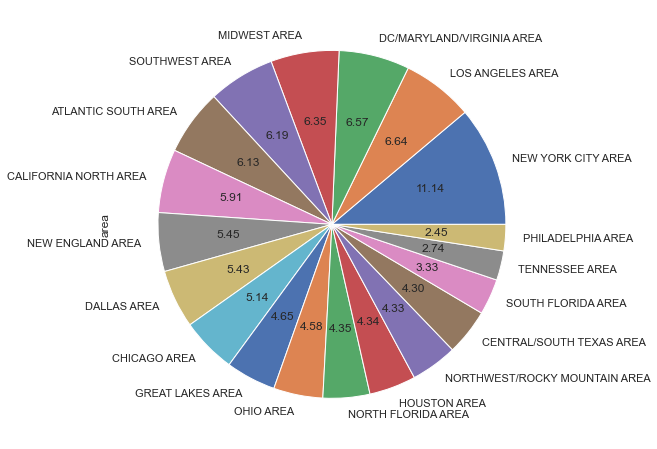

In [39]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
df['area'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

<Figure size 1440x576 with 0 Axes>

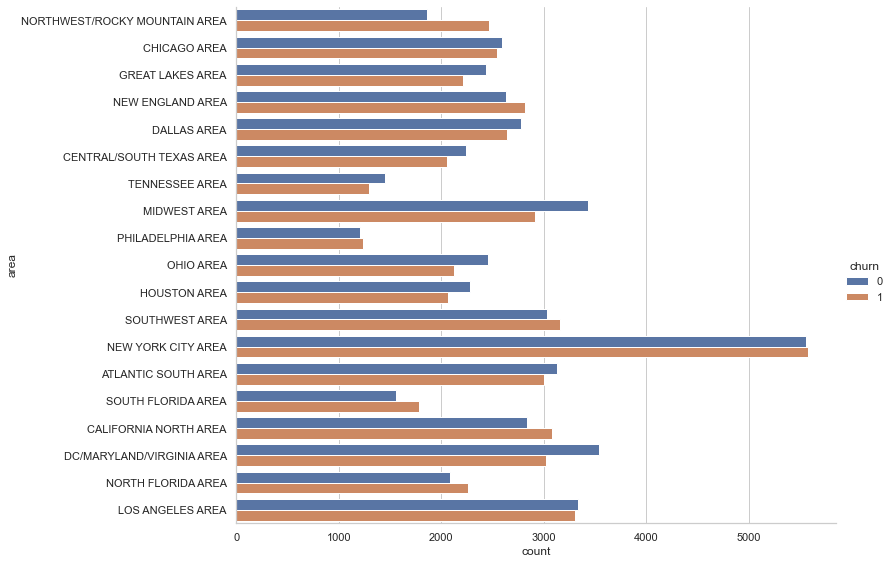

In [40]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(y='area',hue='churn',data=df,kind="count",height=8, aspect=1.5)

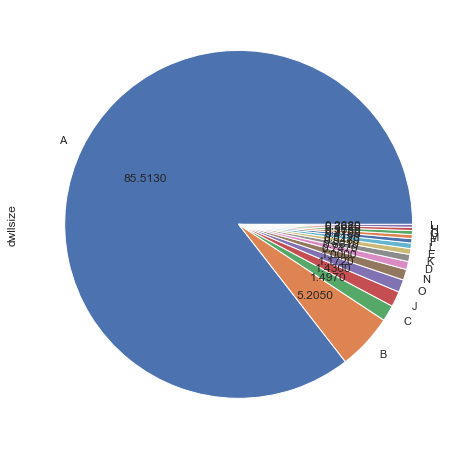

In [41]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
df['dwllsize'].value_counts().plot(kind="pie", autopct="%.4f")
plt.show()

<Figure size 1440x576 with 0 Axes>

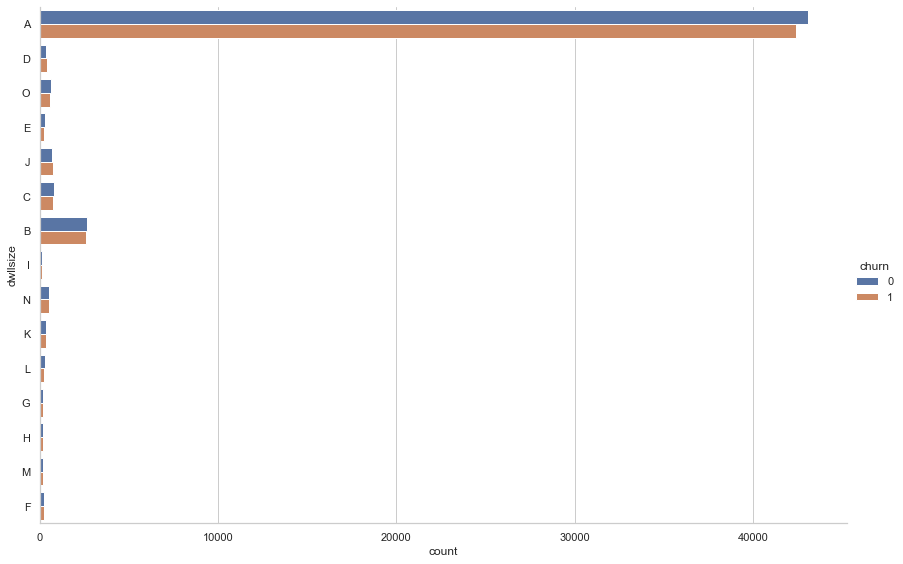

In [42]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(y='dwllsize',hue='churn',data=df,kind="count",height=8, aspect=1.5)

<Figure size 1440x576 with 0 Axes>

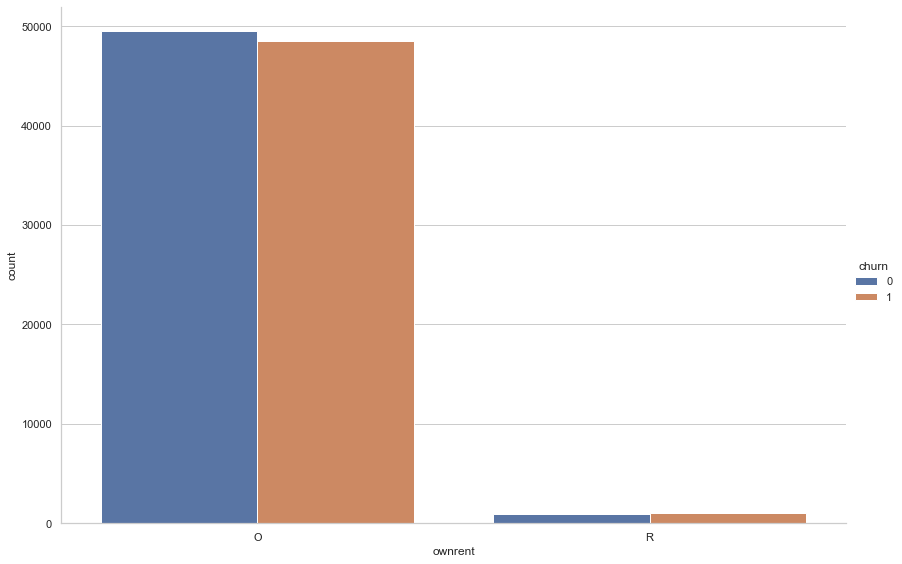

In [43]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='ownrent',hue='churn',data=df,kind="count",height=8, aspect=1.5)

<AxesSubplot:xlabel='creditcd', ylabel='totcalls'>

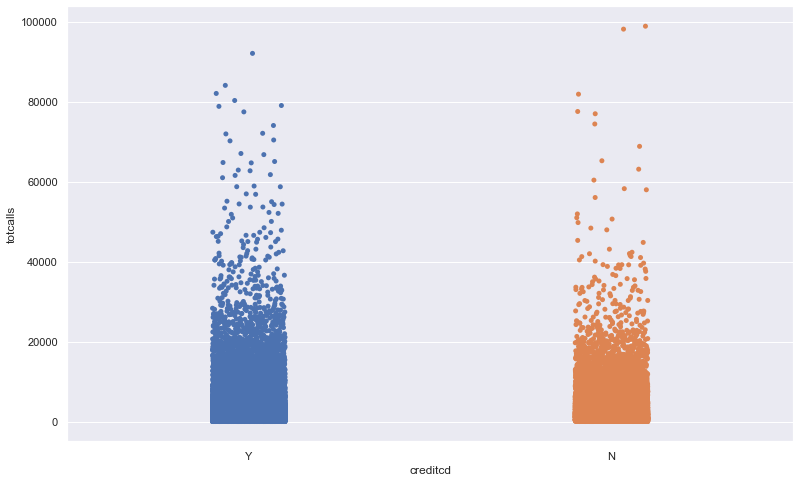

In [44]:
sns.set()
sns.stripplot(data=df, x='creditcd', y='totcalls')

<AxesSubplot:xlabel='churn', ylabel='totcalls'>

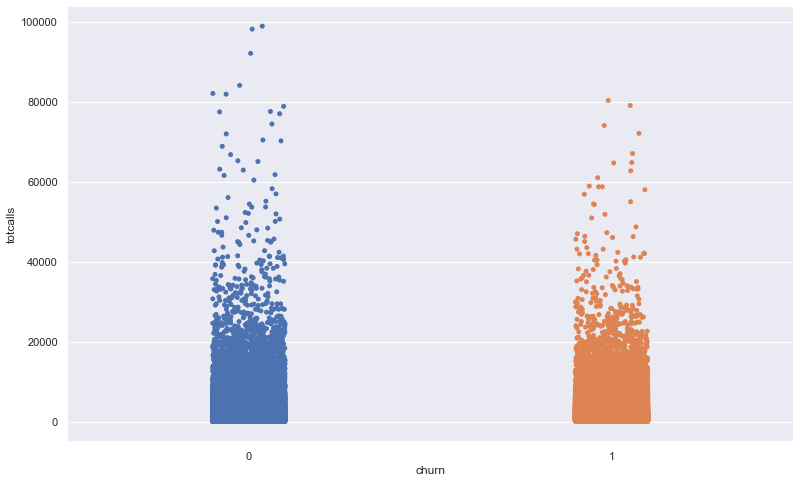

In [45]:
sns.set()
sns.stripplot(data=df, x='churn', y='totcalls')

### Encoding

In [46]:
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [47]:
df_onehot=df.copy()
for col in df_onehot.select_dtypes(include='O').columns:
    df_onehot=one_hot_encoder(df_onehot,col)
    
df_onehot.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID,new_cell_N,new_cell_U,new_cell_Y,crclscod_A,crclscod_A2,crclscod_A3,crclscod_AA,crclscod_B,crclscod_B2,crclscod_BA,crclscod_C,crclscod_C2,crclscod_C5,crclscod_CA,crclscod_CC,crclscod_CY,crclscod_D,crclscod_D2,crclscod_D4,crclscod_D5,crclscod_DA,crclscod_E,crclscod_E2,crclscod_E4,crclscod_EA,crclscod_EC,crclscod_EF,crclscod_EM,crclscod_G,crclscod_GA,crclscod_GY,crclscod_H,crclscod_I,crclscod_IF,crclscod_J,crclscod_JF,crclscod_K,crclscod_L,crclscod_M,crclscod_O,crclscod_P1,crclscod_S,crclscod_TP,crclscod_U,crclscod_U1,crclscod_V,crclscod_V1,crclscod_W,crclscod_Y,crclscod_Z,crclscod_Z1,crclscod_Z2,crclscod_Z4,crclscod_Z5,crclscod_ZA,crclscod_ZF,crclscod_ZY,asl_flag_N,asl_flag_Y,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,area_ATLANTIC SOUTH AREA,area_CALIFORNIA NORTH AREA,area_CENTRAL/SOUTH TEXAS AREA,area_CHICAGO AREA,area_DALLAS AREA,area_DC/MARYLAND/VIRGINIA AREA,area_GREAT LAKES AREA,area_HOUSTON AREA,area_LOS ANGELES AREA,area_MIDWEST AREA,area_NEW ENGLAND AREA,area_NEW YORK CITY AREA,area_NORTH FLORIDA AREA,area_NORTHWEST/ROCKY MOUNTAIN AREA,area_OHIO AREA,area_PHILADELPHIA AREA,area_SOUTH FLORIDA AREA,area_SOUTHWEST AREA,area_TENNESSEE AREA,dualband_N,dualband_T,dualband_U,dualband_Y,refurb_new_N,refurb_new_R,hnd_webcap_UNKW,hnd_webcap_WC,hnd_webcap_WCMB,ownrent_O,ownrent_R,dwlltype_M,dwlltype_S,marital_A,marital_B,marital_M,marital_S,marital_U,infobase_M,infobase_N,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_H,HHstatin_I,dwllsize_A,dwllsize_B,dwllsize_C,dwllsize_D,dwllsize_E,dwllsize_F,dwllsize_G,dwllsize_H,dwllsize_I,dwllsize_J,dwllsize_K,dwllsize_L,dwllsize_M,dwllsize_N,dwllsize_O,ethnic_B,ethnic_C,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,kid0_2_U,kid0_2_Y,kid3_5_U,kid3_5_Y,kid6_10_U,kid6_10_Y,kid11_15_U,kid11_15_Y,kid16_17_U,kid16_17_Y,creditcd_N,creditcd_Y
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,149.989990,2.0,2.0,0.0,0.0,15.0,1.0,4.0,3.0,0.0,361.0,1000001,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,

# Modelling

In [48]:
features = df_onehot.drop('churn',axis = 1).values
target = df_onehot['churn'].values

In [49]:
scaler = StandardScaler()
scaler.fit(features)

StandardScaler()

In [50]:
features = scaler.transform(features)
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,stratify=target)

# Basic Models

## 1. K-Nearest Neighbors

In [51]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [52]:
ypred_knn = knn_model.predict(X_test)

In [53]:
print(classification_report(y_test,ypred_knn))

              precision    recall  f1-score   support

           0       0.54      0.56      0.55     10088
           1       0.53      0.51      0.52      9912

    accuracy                           0.53     20000
   macro avg       0.53      0.53      0.53     20000
weighted avg       0.53      0.53      0.53     20000



In [54]:
def Confusion_Matrix(y_test,ypred):
    cfmat = confusion_matrix(y_test,ypred)
    print('TN - True Negative {}'.format(cfmat[0,0]))
    print('FP - False Positive {}'.format(cfmat[0,1]))
    print('FN - False Negative {}'.format(cfmat[1,0]))
    print('TP - True Positive {}'.format(cfmat[1,1]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cfmat[0,0],cfmat[1,1]]),np.sum(cfmat))))
    print('F1 Score: {}'.format(f1_score(y_test, ypred)))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cfmat[0,1],cfmat[1,0]]),np.sum(cfmat))))


In [55]:
Confusion_Matrix(y_test,ypred_knn)

TN - True Negative 5644
FP - False Positive 4444
FN - False Negative 4868
TP - True Positive 5044
Accuracy Rate: 0.5344
F1 Score: 0.5199999999999999
Misclassification Rate: 0.4656


## 2. Decision Tree 

In [56]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
ypred_tree = dt_model.predict(X_test)

In [59]:
print(classification_report(y_test,ypred_tree))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56     10088
           1       0.55      0.55      0.55      9912

    accuracy                           0.56     20000
   macro avg       0.56      0.56      0.56     20000
weighted avg       0.56      0.56      0.56     20000



In [60]:
Confusion_Matrix(y_test,ypred_tree)

TN - True Negative 5699
FP - False Positive 4389
FN - False Negative 4485
TP - True Positive 5427
Accuracy Rate: 0.5563
F1 Score: 0.5501824817518248
Misclassification Rate: 0.4437


## 3. Random Forest

In [62]:
model_forest = RandomForestClassifier()
model_forest.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
ypred_forest = model_forest.predict(X_test)
ypred_forest

array([0, 1, 0, ..., 0, 0, 0])

In [64]:
print(classification_report(y_test,ypred_forest))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63     10088
           1       0.62      0.60      0.61      9912

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000



In [65]:
Confusion_Matrix(y_test,ypred_forest)

TN - True Negative 6461
FP - False Positive 3627
FN - False Negative 3988
TP - True Positive 5924
Accuracy Rate: 0.61925
F1 Score: 0.6087447978215075
Misclassification Rate: 0.38075
